In [8]:
import pandas as pd

In [93]:
re = pd.read_csv("model_summary/Fund60_ClfSim_testgrd.csv")
re.head()

,Unnamed: 0,training_dates,testing_dates,model_type,clf,parameters,baseline,auc-roc,a_at_5,a_at_20,...,p_at_1,p_at_5,p_at_10,p_at_20,p_at_50,r_at_1,r_at_5,r_at_10,r_at_20,r_at_50
0,0,"(Timestamp('2012-01-01 00:00:00'), Timestamp('...","(Timestamp('2012-07-01 00:00:00'), Timestamp('...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.256928,0.504365,0.693099,0.555210,...,0.000000,0.000000,0.060615,0.030303,0.512151,0.000000,0.000000,0.023587,0.023587,0.996681
1,1,"(Timestamp('2012-01-01 00:00:00'), Timestamp('...","(Timestamp('2012-07-01 00:00:00'), Timestamp('...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",0.256928,0.509293,0.694074,0.544613,...,0.048780,0.009750,0.007615,0.003807,0.500396,0.001896,0.001896,0.002963,0.002963,0.973806
2,2,"(Timestamp('2012-01-01 00:00:00'), Timestamp('...","(Timestamp('2012-07-01 00:00:00'), Timestamp('...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.256928,0.508421,0.693587,0.543578,...,0.024390,0.004875,0.002437,0.001218,0.486266,0.000948,0.000948,0.000948,0.000948,0.946308
3,3,"(Timestamp('2012-01-01 00:00:00'), Timestamp('...","(Timestamp('2012-07-01 00:00:00'), Timestamp('...",RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.256928,0.624663,0.696936,0.674219,...,0.192073,0.038391,0.019190,0.327851,0.330836,0.007467,0.007467,0.007467,0.255185,0.643831
4,4,"(Timestamp('2012-01-01 00:00:00'), Timestamp('...","(Timestamp('2012-07-01 00:00:00'), Timestamp('...",BG,BaggingClassifier(base_estimator=LogisticRegre...,"{'max_features': 0.1, 'max_samples': 0.1, 'n_e...",0.256928,0.543594,0.701443,0.560509,...,0.234756,0.083486,0.041730,0.043551,0.363481,0.009126,0.016238,0.016238,0.033898,0.707360


In [75]:
re.head()
re.columns

Index(['Unnamed: 0', 'training_dates', 'testing_dates', 'model_type', 'clf',
       'parameters', 'baseline', 'auc-roc', 'a_at_5', 'a_at_20', 'a_at_50',
       'f1_at_5', 'f1_at_20', 'f1_at_50', 'p_at_1', 'p_at_5', 'p_at_10',
       'p_at_20', 'p_at_50', 'r_at_1', 'r_at_5', 'r_at_10', 'r_at_20',
       'r_at_50'],
      dtype='object')

In [69]:
met_col = [col for col in re if col.startswith('p_')]
d = dict.fromkeys(met_col, ['mean'])
p = re.groupby('model_type', as_index=False).agg(d)
p.columns = ['_'.join(col) for col in p.columns.values]
p

,model_type_,p_at_1_mean,p_at_5_mean,p_at_10_mean,p_at_20_mean,p_at_50_mean
0,AB,0.000665,0.000133,0.000066,0.046336,0.428432
1,BG,0.426571,0.391441,0.374841,0.354933,0.366241
2,DT,0.152098,0.204760,0.225644,0.258777,0.412639
3,GB,0.000000,0.000000,0.011065,0.005551,0.470547
4,KNN,0.400353,0.407664,0.387430,0.365217,0.384498
5,LR,0.479065,0.483139,0.464739,0.436516,0.372491
6,RF,0.090098,0.060497,0.177232,0.164109,0.479705


In [71]:
met_col = [col for col in re if col.startswith('p_')]
d = dict.fromkeys(met_col, ['mean'])
p = re.groupby('model_type', as_index=False).agg(d)
p.columns = p.columns.droplevel(-1)
p

,model_type,p_at_1,p_at_5,p_at_10,p_at_20,p_at_50
0,AB,0.000665,0.000133,0.000066,0.046336,0.428432
1,BG,0.426571,0.391441,0.374841,0.354933,0.366241
2,DT,0.152098,0.204760,0.225644,0.258777,0.412639
3,GB,0.000000,0.000000,0.011065,0.005551,0.470547
4,KNN,0.400353,0.407664,0.387430,0.365217,0.384498
5,LR,0.479065,0.483139,0.464739,0.436516,0.372491
6,RF,0.090098,0.060497,0.177232,0.164109,0.479705


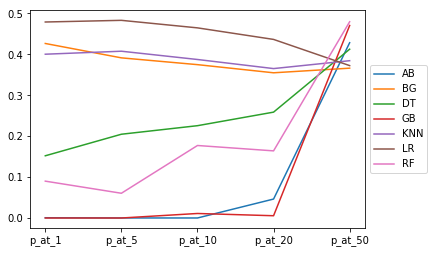

In [74]:
df = p
df=df.set_index("model_type")
for i in range(len(df)):
    plt.plot([k for k in df.columns],[df[y].iloc[i] for y in df.columns])
plt.legend(df.index,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [91]:
def compare_metrics(model_result, pivot_by='model_type', metric='precison'):
    '''
    Compare metrics from multiple model across different by different pivot
    Input: model results from the classifier loop, pivot by = time, classifier used, metric
    Output: plot
    ''' 

    # Change name of metric identifier to identify from model result column name
    if metric == 'precision' or metric == 'Precision':
        metric_iden = 'p_'
    elif metric == 'recall' or metric == 'Recall':
        metric_iden = 'r_'
    if metric == 'accuracy' or metric == 'Accuracy':
        metric_iden = 'a_'
    if metric == 'f1' or metric == 'F1' or metric == 'F-1':
        metric_iden = 'f1_'
        
    # Groupby Data by desired outcome
    met_col = [col for col in model_result if col.startswith(metric_iden)]
    d = dict.fromkeys(met_col, ['mean'])
    plot_df = model_result.groupby(pivot_by, as_index=False).agg(d)
    plot_df.columns = plot_df.columns.droplevel(-1)
    plot_df = plot_df.set_index(pivot_by)
    
    # Multiplots for different threholds
    for i in range(len(plot_df)):
        plt.plot([k for k in plot_df.columns],[plot_df[y].iloc[i] for y in plot_df.columns])
    plt.legend(plot_df.index,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

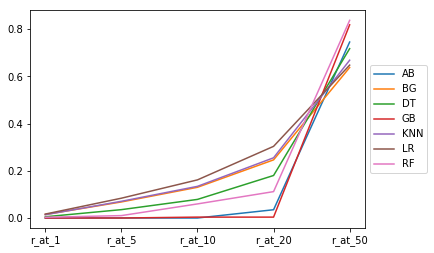

In [92]:
pivot_by = 'model_type'
compare_metric(re, pivot_by,'Recall')

In [51]:
pivot=p.columns.drop('model_type_')
type(pivot)

pandas.core.indexes.base.Index

In [56]:
df = p
df = pd.melt(df, id_vars='model_type_', value_vars=pivot)

In [57]:
df

,model_type_,variable,value
0,AB,p_at_1_mean,0.000665
1,BG,p_at_1_mean,0.426571
2,DT,p_at_1_mean,0.152098
3,GB,p_at_1_mean,0.000000
4,KNN,p_at_1_mean,0.400353
5,LR,p_at_1_mean,0.479065
6,RF,p_at_1_mean,0.090098
7,AB,p_at_5_mean,0.000133
8,BG,p_at_5_mean,0.391441
9,DT,p_at_5_mean,0.204760


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for key, grp in df.groupby(['model_type_']):
    ax = grp.plot(ax=ax, kind='line', x='variable', y='value', c=key, label=key)
    
plt.legend(loc='best')
plt.show()

ValueError: Invalid RGBA argument: 'AB'

<Figure size 432x288 with 1 Axes>

In [1]:
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta


In [5]:

start_time_date = mh.trnf_dtype(df, var_list=date_var, to_type='date')

NameError: name 'Timestamp' is not defined

In [6]:
# A.) Determine start and end date
start_time_date = '2012-01-01 00:00:00'
end_time_date = '2013-12-31 00:00:00'

# progressive train on 6 month window
prediction_windows = [6,12]


In [2]:
time_var='date_posted'
pred_var='fund_60day'
train_start='2012-01-01'
train_end='2012-06-30'
test_start='2012-07-01'
test_end='2012-12-31'

In [7]:
for prediction_window in prediction_windows:
    train_start_time = start_time_date
    train_end_time = train_start_time + relativedelta(months=+prediction_window) - relativedelta(days=+1)
    print('1:',train_end_time)
    
    while train_end_time + relativedelta(months=+prediction_window)<=end_time_date:
        test_start_time = train_end_time + relativedelta(days=+1)
        print('2:',test_start_time)
                
        test_end_time = test_start_time + relativedelta(months=+prediction_window) - relativedelta(days=+1)
        print('3:',test_start_time)

        print('training date range:', train_start_time, train_end_time) 
        print('testing date range:', test_start_time, test_end_time)

        # Build training and testing sets
        print('s')
#         X_train, y_train, X_test, y_test = temporal_train_test_split(df, train_start_time, train_end_time, \
#             test_start_time, test_end_time, time_var, pred_var)

        # Build classifiers: refers to loop identified before for execution
#         row_lst = clf_loop(models_to_run, clfs, grid, X_train, X_test, y_train, y_test, \
#             (train_start_time,train_end_time), (test_start_time,test_end_time))

        # Add time
        train_end_time += relativedelta(months=+prediction_window)
        print('4:',train_end_time)

TypeError: must be str, not relativedelta